In [113]:
import numpy as np

# 1

In [114]:
animals = {'Cow':0, 'Dolphin':1, 'Chicken':2, 'Seal':3, 'Penguin':4, 'Bat':5}

hypotheses = [
    [1,1,0,1,0,1], # Viviparous (definitionally all mammals in set)
    [0,0,1,0,1,0], # Oviparous
    [0,0,1,0,1,1], # Winged
    [0,0,1,0,1,0], # Winged non-flying
    [1,0,1,0,1,1], # Separate 2 hind limbs
    [0,1,0,1,1,0], # Marine habitat
    [1,0,1,0,0,0], # Commonly found on farms
    [0,0,0,1,1,0], # Commonly found in cold areas
    [0,1,0,1,1,0], # Carnivorous
    [1,0,0,0,0,0], # Herbivorous
    [0,0,1,0,0,1], # Omnivorous
    [1,1,1,1,1,1], # Animals
]

In [115]:
hypotheses = np.array(hypotheses)
display(hypotheses.shape)

hypotheses_size = hypotheses.sum(axis=1)
display(hypotheses_size)

hypotheses_names = ['Viviparous', 'Oviparous', 'Winged', 'Winged non-flying', 'Separate 2 hind limbs', 'Marine habitat', 'Commonly found on farms', 'Commonly found in cold areas', 'Carnivorous', 'Herbivorous', 'Omnivorous', 'Animals']
hypotheses_named = {name: hypothesis for name, hypothesis in zip(hypotheses_names, hypotheses)}

# display(hypotheses_named)

(12, 6)

array([4, 2, 3, 2, 4, 3, 2, 2, 3, 1, 2, 6])

# 2

## Prior distribution

A prior distribution I think may heuristically address the concern described below is to have the prior probability of each hypothesis $h_i$ be proportional to the inverse of the sum of the L0 norm distances (themselves normalized) to all hypothesis (including to $h_i$ itself).

## Motivation and Justification

It is plausible to expect that, when coming up with hypotheses, I may have created more hypotheses involving certain subsets of animals simply because they came to mind more readily. In the extreme, I could include many copies of nearly-identical hypotheses despite the fact that they may not be representative of all plausible hypotheses.

The motivation for this approach is that a hypothesis begins with a prior likelihood of 1 divided by a denominator. Because a hypothesis has a normalized L0 similarity of 1 to itself, that denominator has at the very least a value of 1. The normalized similarity of each other hypothesis is added to the denominator. Hence, the more similarities which exist relative to other hypotheses, the smaller the prior likelihood will be.

Consider example hypotheses $h_1, h_2, h_3$, where $h_1 = h_2$ and $h_3 = \neg h_1$. Under this prior distribution, since $h_1 = h_2$, both should have a prior prior equal to $1/(1+1+0) = 1/2$. $h_3$ will have a prior equal to $1/(1+0+0) = 1$.

Note: Some hypotheses which are defined by membership, others functionally by non-membership. The L0 norm does not identify that some hypotheses may be quite similar, just with their bits flipped. One way to address this such that our distribution still achieves similar results would be to not only compute L0 scores with all other hypotheses, but with the negations of those hypotheses as well. However, we leave that for future work.

In [116]:
similarities = np.empty(shape=(len(hypotheses), len(hypotheses)))
for i, h_i in enumerate(hypotheses):
    sim = [len(animals) - np.linalg.norm(h_i - h_o, ord=0) for o, h_o in enumerate(hypotheses)]
    similarities[i] = np.array(sim)
# display(similarities)

similarities_norm = similarities / len(animals) # max similarity should = 1, least smilarity = 0
# display(similarities_norm.round(decimals=2))

similarities_norm_sum = similarities_norm.sum(axis=1)
# display(similarities_norm_sum)

h_likelihoods = 1 / similarities_norm_sum
# display(h_likelihoods.round(decimals=2))

h_probabilities_prior = h_likelihoods / h_likelihoods.sum()
display(h_probabilities_prior.round(decimals=2))

array([0.11, 0.07, 0.07, 0.07, 0.08, 0.09, 0.08, 0.08, 0.09, 0.09, 0.08,
       0.09])

# 3

In [117]:
def prob_posterior_h_given_x(h, x, f_prob_x_given_h):
    # h is the index of a particular hypothesis
    # x is a list of indices of animals
    # f_prob_x_given_h is a function that depends on weak/strong sampling
    numerator = h_probabilities_prior[h] * np.prod([f_prob_x_given_h(x_i,h) for x_i in x])
    denominator = np.sum([h_probabilities_prior[h_prime] * np.prod([f_prob_x_given_h(x_i,h_prime) for x_i in x]) for h_prime in range(len(hypotheses))])
    return numerator / denominator

In [118]:
# Weak sampling

def prob_x_given_h_weak(x, h):
    return 1 if hypotheses[h][x] == 1 else 0

def prob_posterior_h_given_x_weak(h, x):
    return prob_posterior_h_given_x(h, x, prob_x_given_h_weak)

In [119]:
# Strong sampling

def prob_x_given_h_strong(x, h):
    return 1/hypotheses_size[h] if hypotheses[h][x] == 1 else 0

def prob_posterior_h_given_x_strong(h, x):
    return prob_posterior_h_given_x(h, x, prob_x_given_h_strong)

## (a)

In [120]:
prob_over_hypotheses = [prob_posterior_h_given_x_weak(x=[animals['Cow']], h=h_i) for h_i in range(len(hypotheses))]
for i, p in enumerate(prob_over_hypotheses):
    print(f'{p:.2f}', hypotheses_names[i])

0.25 Viviparous
0.00 Oviparous
0.00 Winged
0.00 Winged non-flying
0.17 Separate 2 hind limbs
0.00 Marine habitat
0.18 Commonly found on farms
0.00 Commonly found in cold areas
0.00 Carnivorous
0.19 Herbivorous
0.00 Omnivorous
0.20 Animals


In [121]:
prob_over_hypotheses = [prob_posterior_h_given_x_strong(x=[animals['Cow']], h=h_i) for h_i in range(len(hypotheses))]
for i, p in enumerate(prob_over_hypotheses):
    print(f'{p:.2f}', hypotheses_names[i])

0.15 Viviparous
0.00 Oviparous
0.00 Winged
0.00 Winged non-flying
0.10 Separate 2 hind limbs
0.00 Marine habitat
0.22 Commonly found on farms
0.00 Commonly found in cold areas
0.00 Carnivorous
0.46 Herbivorous
0.00 Omnivorous
0.08 Animals


After observing that a Cow has the "property of interest", only hypotheses of which Cow is a member have > 0 probability, which is to be expected. 

Under the weak sampling assumption, the probability of any plausible hypotheses are roughly uniform, with slight variations due to the choice of priors.

Under the strong sampling assumption, however, the probability of plausible hypotheses skews strongly toward the Herbivorous hypothesis because Cow is the only member of this hypothesis.

## (b)

In [122]:
x_b = ['Cow', 'Chicken', 'Penguin']
x_b = [animals[a] for a in x_b]
prob_over_hypotheses = [prob_posterior_h_given_x_weak(x=x_b, h=h_i) for h_i in range(len(hypotheses))]
for i, p in enumerate(prob_over_hypotheses):
    print(f'{p:.2f}', hypotheses_names[i])

0.00 Viviparous
0.00 Oviparous
0.00 Winged
0.00 Winged non-flying
0.46 Separate 2 hind limbs
0.00 Marine habitat
0.00 Commonly found on farms
0.00 Commonly found in cold areas
0.00 Carnivorous
0.00 Herbivorous
0.00 Omnivorous
0.54 Animals


In [123]:
x_b = ['Cow', 'Chicken', 'Penguin']
x_b = [animals[a] for a in x_b]
prob_over_hypotheses = [prob_posterior_h_given_x_strong(x=x_b, h=h_i) for h_i in range(len(hypotheses))]
for i, p in enumerate(prob_over_hypotheses):
    print(f'{p:.2f}', hypotheses_names[i])

0.00 Viviparous
0.00 Oviparous
0.00 Winged
0.00 Winged non-flying
0.74 Separate 2 hind limbs
0.00 Marine habitat
0.00 Commonly found on farms
0.00 Commonly found in cold areas
0.00 Carnivorous
0.00 Herbivorous
0.00 Omnivorous
0.26 Animals


With the observation of more animals that have the "property of interest", some hypotheses have been plainly ruled out and thus now have probability of 0.

Of the two that remain, under weak sampling, both have around equal probability.

Under strong sampling, however, probability skews far more toward `Separate 2 hind limbs` than `Animals` because the latter applies to all animals and the former only to those 3 and Bat.

# 4

In [124]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

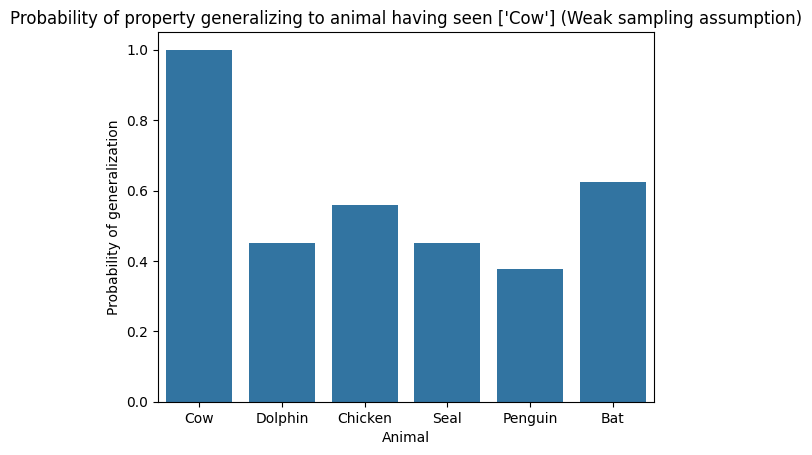

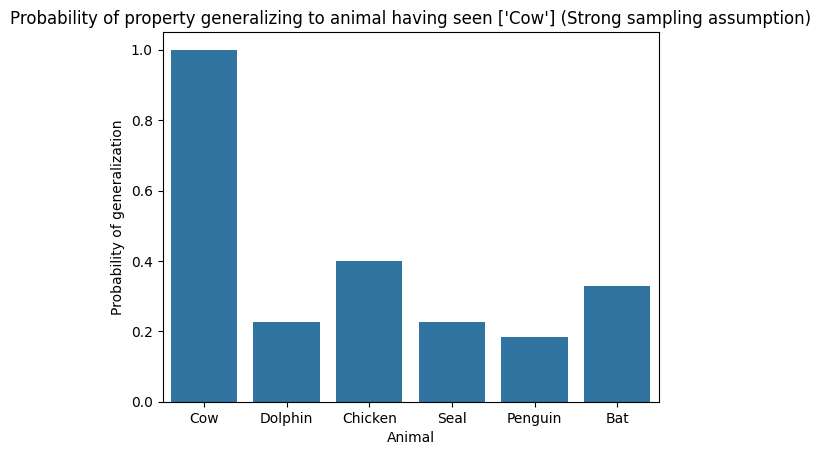

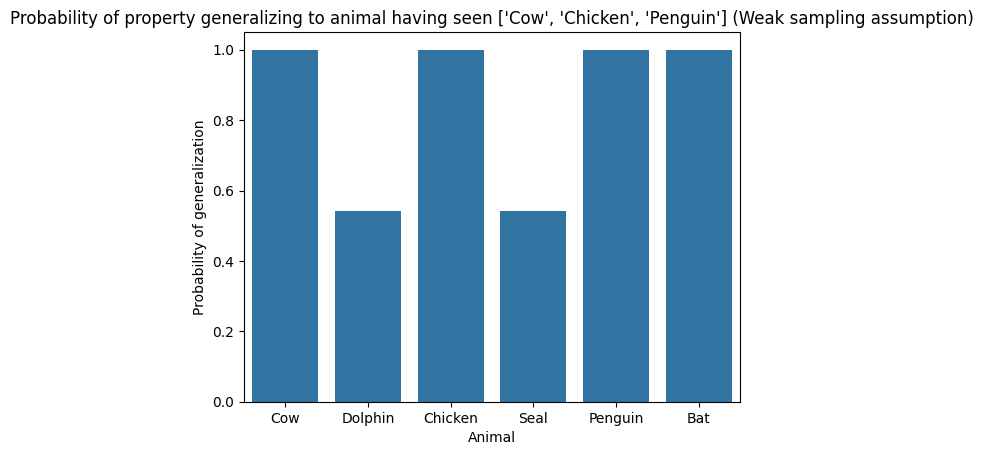

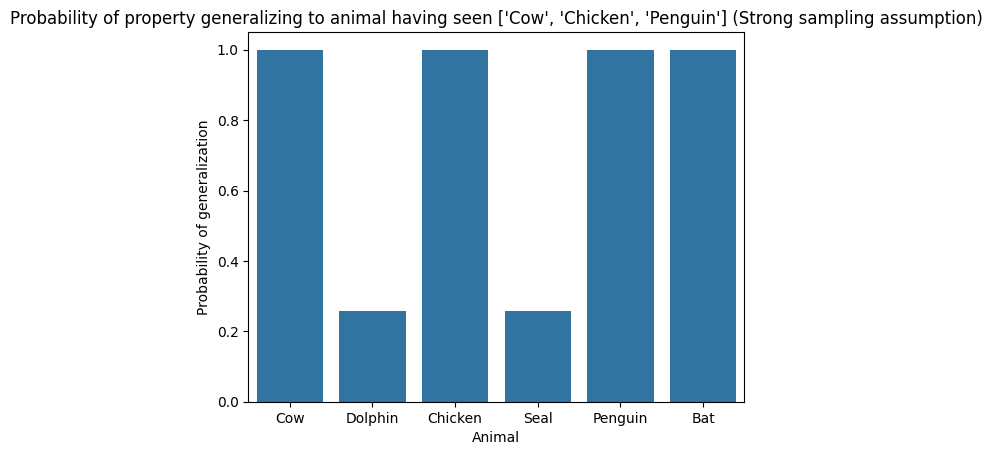

In [125]:
def predictive_dist(x_n, x, f_p_h_given_x):
    return np.sum([0 if hypotheses[h_i][x_n] == 0 else f_p_h_given_x(x=x, h=h_i) for h_i in range(len(hypotheses))])

def predictive_dist_weak(x_n, x):
    return predictive_dist(x_n, x, prob_posterior_h_given_x_weak)

def predictive_dist_strong(x_n, x):
    return predictive_dist(x_n, x, prob_posterior_h_given_x_strong)

for obs in [['Cow'],['Cow', 'Chicken', 'Penguin']]:
    for assumption, f in {'Weak':predictive_dist_weak, 'Strong':predictive_dist_strong}.items():
        p_generalize = {}
        for animal in animals.keys():
            x_n = animals[animal]
            x_b = obs
            x_b_idx = [animals[a] for a in x_b]
            p = f(x_n=x_n, x=x_b_idx)
            p_generalize[animal] = p

        p_generalize = [(k,v) for k,v in p_generalize.items()]
        # animal_names = [k for k in p_generalize.keys()]
        # animal_probs = [v for v in p_generalize.values()]
        df_generalize = pd.DataFrame(data=p_generalize, columns=['Animal', 'Probability of generalization'])
        # display(df_generalize)
        plt.figure()
        sb.barplot(data=df_generalize, x='Animal', y='Probability of generalization')
        plt.title(f'Probability of property generalizing to animal having seen {x_b} ({assumption} sampling assumption)')

With only one observation:
- Under the weak sampling assumption, probabilities of other animals sharing property are more or less even. Penguin does appear to be lowest owing not overlapping much with Cow (different diet, habitat, birthing process, etc.).
- Under the strong sampling assumption, the probabilities of animals go down significantly, this may be because the cow belongs to Herbivore, one hypothesis which only contains itself.

With multiple observations:
- Under the weak sampling assumption, probabilities of animals in the '2 separate hind limbs' hypothesis are near 1 and around 0.5 for the others.
- Under the strong sampling assumption, the probabilities for the animals in the '2 separate hind limbs' hypothesis remain near 1 and the others drop.

The drop between weak and strong of certain animals' probabilities can most likely be attributed to the reduced probability of hypotheses which include more of the animals.

# 5

In [126]:
hypotheses = [[int(c) for c in f'{np.binary_repr(e)}'.rjust(6, '0')] for e in range(1,64)]
# display(all_hyp)

hypotheses = np.array(hypotheses)
# display(hypotheses.shape)

similarities = np.empty(shape=(len(hypotheses), len(hypotheses)))
for i, h_i in enumerate(hypotheses):
    sim = [len(animals) - np.linalg.norm(h_i - h_o, ord=0) for o, h_o in enumerate(hypotheses)]
    similarities[i] = np.array(sim)
# display(similarities)

similarities_norm = similarities / len(animals) # max similarity should = 1, least smilarity = 0

similarities_norm_sum = similarities_norm.sum(axis=1)
h_likelihoods = 1 / similarities_norm_sum
h_probabilities_prior = h_likelihoods / h_likelihoods.sum()
# display(h_probabilities_prior.round(decimals=2))

hypotheses_size = hypotheses.sum(axis=1)
# display(hypotheses_size)

### Re-doing problem 3

In [127]:
for obs in [['Cow'],['Cow', 'Chicken', 'Penguin']]:
    for assumption, f in {'Weak':prob_posterior_h_given_x_weak, 'Strong': prob_posterior_h_given_x_strong}.items():
        print(f'Under assumption of {assumption} sampling, having observed {obs}')
        x_b = obs
        x_b = [animals[a] for a in x_b]
        prob_over_hypotheses = [f(x=x_b, h=h_i) for h_i in range(len(hypotheses))]
        relevant_probs = 0
        for i, p in enumerate(prob_over_hypotheses):
            if p > 0:
                print(f'{p:.2f}', f'Hypothesis {i}: {hypotheses[i]}')
                relevant_probs += 1
        print(f'# of non-zero hypothesis = {relevant_probs}\n')


Under assumption of Weak sampling, having observed ['Cow']
0.03 Hypothesis 31: [1 0 0 0 0 0]
0.03 Hypothesis 32: [1 0 0 0 0 1]
0.03 Hypothesis 33: [1 0 0 0 1 0]
0.03 Hypothesis 34: [1 0 0 0 1 1]
0.03 Hypothesis 35: [1 0 0 1 0 0]
0.03 Hypothesis 36: [1 0 0 1 0 1]
0.03 Hypothesis 37: [1 0 0 1 1 0]
0.03 Hypothesis 38: [1 0 0 1 1 1]
0.03 Hypothesis 39: [1 0 1 0 0 0]
0.03 Hypothesis 40: [1 0 1 0 0 1]
0.03 Hypothesis 41: [1 0 1 0 1 0]
0.03 Hypothesis 42: [1 0 1 0 1 1]
0.03 Hypothesis 43: [1 0 1 1 0 0]
0.03 Hypothesis 44: [1 0 1 1 0 1]
0.03 Hypothesis 45: [1 0 1 1 1 0]
0.03 Hypothesis 46: [1 0 1 1 1 1]
0.03 Hypothesis 47: [1 1 0 0 0 0]
0.03 Hypothesis 48: [1 1 0 0 0 1]
0.03 Hypothesis 49: [1 1 0 0 1 0]
0.03 Hypothesis 50: [1 1 0 0 1 1]
0.03 Hypothesis 51: [1 1 0 1 0 0]
0.03 Hypothesis 52: [1 1 0 1 0 1]
0.03 Hypothesis 53: [1 1 0 1 1 0]
0.03 Hypothesis 54: [1 1 0 1 1 1]
0.03 Hypothesis 55: [1 1 1 0 0 0]
0.03 Hypothesis 56: [1 1 1 0 0 1]
0.03 Hypothesis 57: [1 1 1 0 1 0]
0.03 Hypothesis 58: [1 

When all hypotheses are considered, plausible (non-zero) hypotheses are exactly those which are consistent with observations. In particular, under weak sampling, hypotheses seem to all have the same probability, which makes this process of generalization nearly useless.

Under strong sampling we do have a higher probability for hypotheses which only include our observations. However, it keeps the exact same number of non-zero probability hypotheses and thus is perhaps not the most useful approach.

### Re-doing problem 4

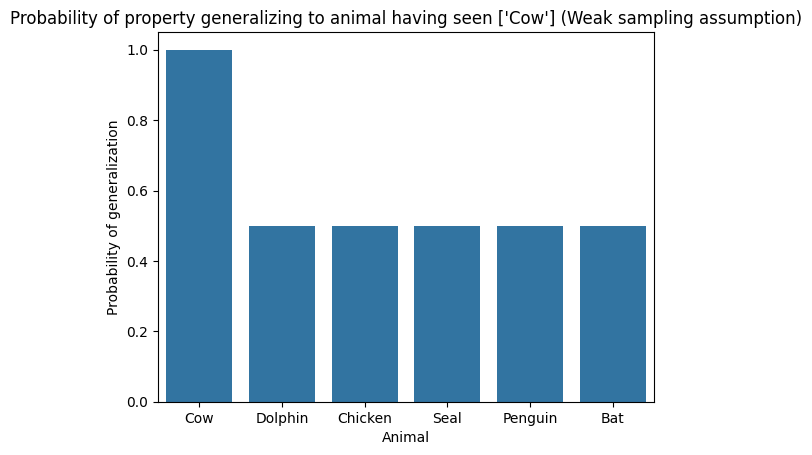

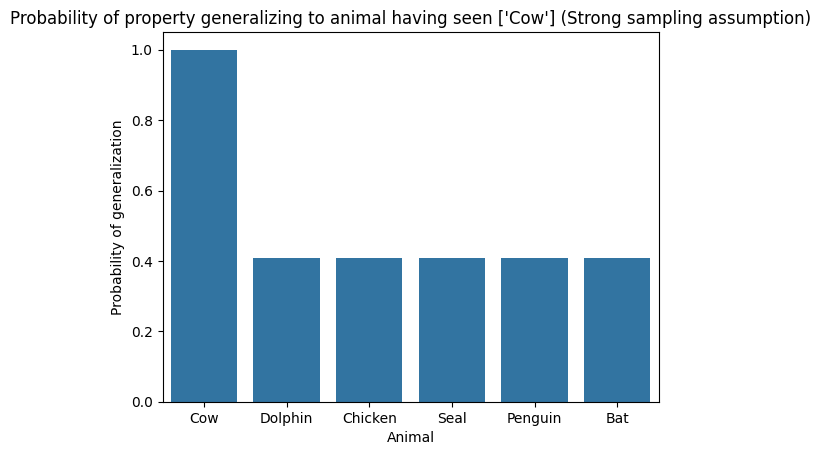

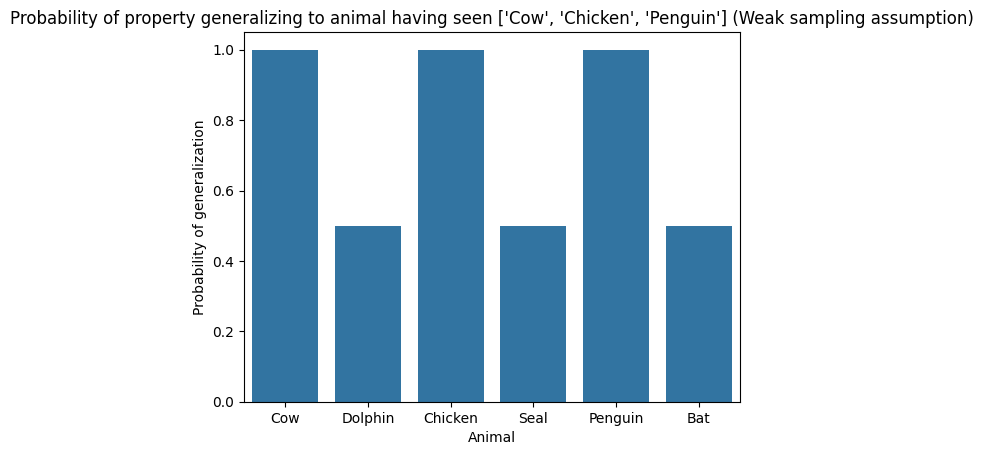

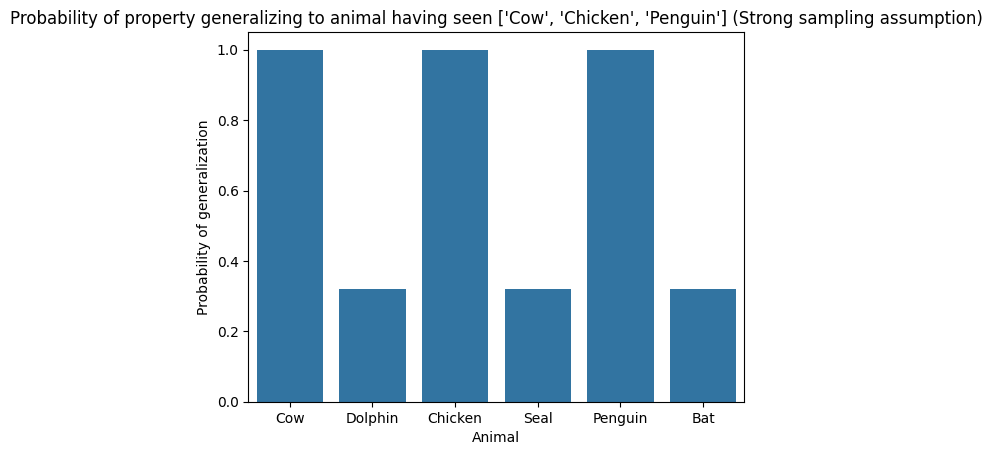

In [128]:
for obs in [['Cow'],['Cow', 'Chicken', 'Penguin']]:
    for assumption, f in {'Weak':predictive_dist_weak, 'Strong':predictive_dist_strong}.items():
        p_generalize = {}
        for animal in animals.keys():
            x_n = animals[animal]
            x_b = obs
            x_b_idx = [animals[a] for a in x_b]
            p = f(x_n=x_n, x=x_b_idx)
            p_generalize[animal] = p

        p_generalize = [(k,v) for k,v in p_generalize.items()]
        # animal_names = [k for k in p_generalize.keys()]
        # animal_probs = [v for v in p_generalize.values()]
        df_generalize = pd.DataFrame(data=p_generalize, columns=['Animal', 'Probability of generalization'])
        # display(df_generalize)
        plt.figure()
        sb.barplot(data=df_generalize, x='Animal', y='Probability of generalization')
        plt.title(f'Probability of property generalizing to animal having seen {x_b} ({assumption} sampling assumption)')

We see roughly the same effect when re-doing problem 4. In particular, animals which are consistent with those which have already been seen are given higher probability. The rest are given lower probabilities that are all the same. What we see is that, when considering all possible hypotheses, the model actually fails to generalize the property to Bat, giving it no higher of a chance than any of the other non-observed animals.

What is being exhibited above is an example of the "No Free Lunch" Theorem. In the context of this problem, it means that, when trying to generalize a concept, considering all possible hypothesis can actually hinder us. While the inclusion of more hypotheses can sometimes help, it may also sometimes hinder us.

From Wikipedia, "it follows that if an algorithm achieves superior results on some problems, it must pay with inferiority on other problems." Our algorithm may be open-minded by considering all hypotheses, but as a result has midling performance comparable in some cases to a simple process of elimination.